In [1]:
#Importing data from a flat file (.csv)


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Importing data from a flat file (.csv) Germany Car Dataset

In [39]:
GermanCars=pd.read_csv("autoscout24-germany-car.csv")

In [77]:
#Understanding the data
print(GermanCars.head())
print(GermanCars.shape)
print(GermanCars.info())
print(GermanCars.describe())

   mileage        make   model      fuel    gear offerType  price     hp  year
0   235000         BMW     316    Diesel  Manual      Used   6800  116.0  2011
1    92800  Volkswagen    Golf  Gasoline  Manual      Used   6877  122.0  2011
2   149300        SEAT    Exeo  Gasoline  Manual      Used   6900  160.0  2011
3    96200     Renault  Megane  Gasoline  Manual      Used   6950  110.0  2011
4   156000     Peugeot     308  Gasoline  Manual      Used   6950  156.0  2011
(46405, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   ye

In [83]:
#Sorting Rows by low mileage low price
GermanCars_Sort=GermanCars.sort_values(["mileage","price"],ascending=[1,1])
print(GermanCars_Sort.head())

       mileage     make   model      fuel       gear       offerType  price  \
43263        0   Others     NaN  Electric  Automatic            Used   5999   
19433        0  Renault  Twingo  Gasoline     Manual  Pre-registered  10299   
11946        0  Renault  Twingo  Gasoline     Manual            Used  10490   
19442        0  Renault  Twingo  Gasoline     Manual   Demonstration  10668   
19447        0  Renault  Twingo  Gasoline     Manual  Pre-registered  10799   

         hp  year  
43263   3.0  2019  
19433  65.0  2021  
11946  69.0  2018  
19442  65.0  2021  
19447  65.0  2021  


In [86]:
#Subsetting the dataframe with only make, fuel and mileage columns
GermanCars_SubsetC=GermanCars[["make","fuel","mileage"]]
print(GermanCars_SubsetC.head())

         make      fuel  mileage
0         BMW    Diesel   235000
1  Volkswagen  Gasoline    92800
2        SEAT  Gasoline   149300
3     Renault  Gasoline    96200
4     Peugeot  Gasoline   156000


In [90]:
#Subsetting the dataframe with rows for Electric cars with price tag less than 10000
GermanCars_SubsetR=GermanCars[(GermanCars["price"]<10000)&(GermanCars["fuel"]=="Electric")]
print(GermanCars_SubsetR.head())

      mileage     make model      fuel       gear offerType  price    hp  year
313     33000  Renault   ZOE  Electric  Automatic      Used   8495  58.0  2016
365      3500   Others   NaN  Electric     Manual      Used   5500  38.0  2018
918     20000  Peugeot   iOn  Electric  Automatic      Used   8815  67.0  2016
1087    32900  Renault   ZOE  Electric  Automatic      Used   6250  58.0  2014
1333    38000  Renault   ZOE  Electric        NaN      Used   8750  88.0  2016


In [95]:
#Count the number of carsof each fuel type
GermanCars_fuel=GermanCars["fuel"].value_counts()
GermanCars_type=GermanCars["offerType"].value_counts()
GermanCars_make=GermanCars["make"].value_counts()
GermanCars_gear=GermanCars["gear"].value_counts()
print(GermanCars_fuel)
print(GermanCars_type)
print(GermanCars_make.head())
print(GermanCars_gear)

Gasoline             28864
Diesel               15244
Electric/Gasoline     1158
Electric               758
LPG                    126
CNG                    117
Others                  56
Electric/Diesel         53
-/- (Fuel)              26
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64
Used              40122
Pre-registered     2780
Demonstration      2368
Employee's car     1122
New                  13
Name: offerType, dtype: int64
Volkswagen    6931
Opel          4814
Ford          4442
Skoda         2889
Renault       2830
Name: make, dtype: int64
Manual            30380
Automatic         15787
Semi-automatic       56
Name: gear, dtype: int64


In [101]:
#Counting & checking the percentage of missing values in the data
missing_vaalues_count=GermanCars.isnull().sum()
print(missing_values_count[0:8])
GermanCars_Misspercent=GermanCars.isnull().mean().sort_values(ascending=False)*100
print(GermanCars_Misspercent)

make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64
gear         0.392199
model        0.308156
hp           0.062493
mileage      0.000000
make         0.000000
fuel         0.000000
offerType    0.000000
price        0.000000
year         0.000000
dtype: float64


In [41]:
#Dropping the rows with missing values & comparing the shapes
GermanCarsDR=GermanCars.dropna()
print(GermanCars.shape,GermanCarsDR.shape)

(46405, 9) (46071, 9)


In [42]:
#Dropping Duplicates
GermanCars1=GermanCarsDR.drop_duplicates() 
print(GermanCarsDR.shape,GermanCars1)

(46071, 9)        mileage        make   model               fuel    gear       offerType  \
0       235000         BMW     316             Diesel  Manual            Used   
1        92800  Volkswagen    Golf           Gasoline  Manual            Used   
2       149300        SEAT    Exeo           Gasoline  Manual            Used   
3        96200     Renault  Megane           Gasoline  Manual            Used   
4       156000     Peugeot     308           Gasoline  Manual            Used   
...        ...         ...     ...                ...     ...             ...   
46394       10     Citroen      C1           Gasoline  Manual  Pre-registered   
46396       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46397      550        Fiat     500  Electric/Gasoline  Manual   Demonstration   
46398      837        Fiat   Panda  Electric/Gasoline  Manual   Demonstration   
46399     1500       Skoda   Fabia           Gasoline  Manual   Demonstration   

       price    

In [47]:
#Swapping the year and mileage columns

GermanCars2=GermanCars1[["year","make","model","fuel","gear","offerType","price","hp","mileage"]] 

In [48]:
print(GermanCars2.head())

   year        make   model      fuel    gear offerType  price     hp  mileage
0  2011         BMW     316    Diesel  Manual      Used   6800  116.0   235000
1  2011  Volkswagen    Golf  Gasoline  Manual      Used   6877  122.0    92800
2  2011        SEAT    Exeo  Gasoline  Manual      Used   6900  160.0   149300
3  2011     Renault  Megane  Gasoline  Manual      Used   6950  110.0    96200
4  2011     Peugeot     308  Gasoline  Manual      Used   6950  156.0   156000


In [102]:
print(GermanCars2.shape)

(43947, 9)


In [54]:
print(GermanCars["mileage"].mean())

71177.86410947096


In [55]:
#counting different makes of cars

GermanCars2["make"].value_counts(sort=True)  

Volkswagen    6680
Opel          4576
Ford          4245
Skoda         2737
Renault       2659
              ... 
Brilliance       1
Isuzu            1
Alpine           1
FISKER           1
Others           1
Name: make, Length: 71, dtype: int64

In [56]:
#counting different types of fuels

GermanCars2["fuel"].value_counts(sort=True)  

Gasoline             27246
Diesel               14684
Electric/Gasoline     1039
Electric               639
CNG                    113
LPG                    109
Electric/Diesel         49
Others                  45
-/- (Fuel)              20
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

In [58]:
#counting different types of transmission

GermanCars2["gear"].value_counts(sort=True)  

Manual            28752
Automatic         15141
Semi-automatic       54
Name: gear, dtype: int64

In [65]:
#Grouping by fuel type for mileage and price

GermanCars2.groupby("fuel")[["mileage","price"]].mean() 

,mileage,price
fuel,,
-/- (Fuel),74904.250000,13064.900000
CNG,81870.442478,12539.575221
Diesel,108821.448379,18075.120131
Electric,21766.264476,23330.940532
Electric/Diesel,55801.612245,36966.448980
Electric/Gasoline,28105.293551,30692.186718
Ethanol,180000.000000,3450.000000
Gasoline,55442.479593,15031.358915
Hydrogen,27000.000000,34990.000000


In [67]:
GermanCars2.pivot_table(values="hp",index="fuel")

,hp
fuel,
-/- (Fuel),129.850000
CNG,105.513274
Diesel,152.904931
Electric,129.070423
Electric/Diesel,213.918367
Electric/Gasoline,176.596728
Ethanol,122.500000
Gasoline,121.789584
Hydrogen,154.000000


In [69]:
#Grouping by pivot table on tranmission type

GermanCars2.pivot_table(values=["price","mileage"],index="gear") 

,mileage,price
gear,,
Automatic,64053.385047,28054.255399
Manual,76638.950090,10501.882269
Semi-automatic,84548.388889,8374.796296


In [70]:
#Grouping by pivot table on offertype

GermanCars2.pivot_table(values=["price","mileage"],index="offerType") 

,mileage,price
offerType,,
Demonstration,7263.502691,35068.531390
Employee's car,10699.665741,30836.810185
New,44.000000,74875.363636
Pre-registered,166.737096,22399.141341
Used,81701.077192,14743.553290


In [112]:
#Indexing

TopCars=["Volkswagen","Opel","Ford","Skoda","Renault"]
GermanCars2_TopCars=GermanCars2[GermanCars2["make"].isin(TopCars)]
print(GermanCars2_TopCars)

       year        make         model      fuel       gear       offerType  \
1      2011  Volkswagen          Golf  Gasoline     Manual            Used   
3      2011     Renault        Megane  Gasoline     Manual            Used   
6      2011     Renault        Scenic    Diesel     Manual            Used   
7      2011        Opel        Zafira  Gasoline     Manual            Used   
9      2011        Ford       Transit    Diesel     Manual            Used   
...     ...         ...           ...       ...        ...             ...   
46376  2021     Renault  Grand Scenic  Gasoline     Manual   Demonstration   
46377  2021  Volkswagen          Golf    Diesel  Automatic  Pre-registered   
46379  2021     Renault        Kadjar  Gasoline     Manual   Demonstration   
46381  2021  Volkswagen       T-Cross  Gasoline  Automatic   Demonstration   
46399  2021       Skoda         Fabia  Gasoline     Manual   Demonstration   

       price     hp  mileage  
1       6877  122.0    92800  
3

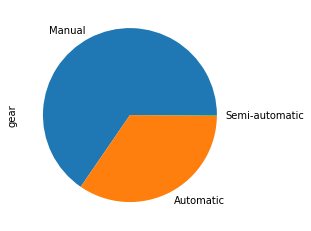

In [126]:
GermanCars2["gear"].value_counts().plot.pie()
plt.show()